In [1]:
# 导入常用包
import xgboost as xgb
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import SelectFromModel

In [2]:
# 数据集
cancer = datasets.load_breast_cancer()
X = cancer.data
Y = cancer.target

In [3]:
# 数据集的情况
# X.shape
# Y.shape
# X, Y

In [4]:
# 拆分训练集、测试集
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/5., random_state = 8)

In [5]:
xgb_train = xgb.DMatrix(X_train, label = Y_train)
xgb_test  = xgb.DMatrix(X_test,  label = Y_test)

In [6]:
params = {"objective": "binary:logistic",
          "booster": "gbtree",
          "eta": 0.1,
          "max_depth": 2
         }

num_round = 20

In [7]:
watchlist = [(xgb_test, 'eval'), (xgb_train, 'train')]

In [8]:
bst = xgb.train(params, xgb_train, num_round, watchlist)

[0]	eval-error:0.10526	train-error:0.04835
[1]	eval-error:0.08772	train-error:0.04835
[2]	eval-error:0.08772	train-error:0.04615
[3]	eval-error:0.07895	train-error:0.04176
[4]	eval-error:0.04386	train-error:0.03956
[5]	eval-error:0.04386	train-error:0.03517
[6]	eval-error:0.03509	train-error:0.03077
[7]	eval-error:0.03509	train-error:0.02857
[8]	eval-error:0.03509	train-error:0.03077
[9]	eval-error:0.03509	train-error:0.02857
[10]	eval-error:0.03509	train-error:0.02857
[11]	eval-error:0.03509	train-error:0.02857
[12]	eval-error:0.03509	train-error:0.02637
[13]	eval-error:0.03509	train-error:0.02418
[14]	eval-error:0.03509	train-error:0.02418
[15]	eval-error:0.03509	train-error:0.02418
[16]	eval-error:0.02632	train-error:0.02198
[17]	eval-error:0.04386	train-error:0.02418
[18]	eval-error:0.03509	train-error:0.01978
[19]	eval-error:0.03509	train-error:0.01978


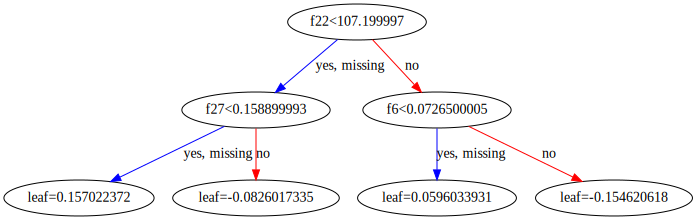

In [9]:
# xgb单棵树可视化，num_tree共50棵树，取值为 [0, 49]
xgb.to_graphviz(bst, fmap = '', num_trees = 2)